# Data Exploration

In [86]:
# 1. Exploring Your Data
# Load the dataset into a Pandas DataFrame.
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")



## Display Head

In [87]:
df.head(10)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
5,5,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,47307.0,2.0 16V Twin Spark
6,6,alfa-romeo,Alfa Romeo 145,red,12/1996,1996,3500,110,150,Manual,Petrol,"8,8 l/100 km",210 g/km,230000.0,Quadrifoglio
7,7,alfa-romeo,Alfa Romeo 164,black,07/1996,1996,5500,132,179,Manual,Petrol,"13,4 l/100 km",320 g/km,168000.0,(3.0) V6 Super
8,8,alfa-romeo,Alfa Romeo Spider,black,07/1996,1996,8990,141,192,Manual,Petrol,11 l/100 km,265 g/km,168600.0,|HU:neu|Klimaanlage|Youngtimer|
9,9,alfa-romeo,Alfa Romeo Spider,black,01/1996,1996,6976,110,150,Manual,Petrol,"9,2 l/100 km",220 g/km,99000.0,2.0 T.Spark L *Klima *2.Hand *Zahnriemen


## Description of Data

In [88]:
print(df.describe())

          Unnamed: 0  mileage_in_km
count  251079.000000   2.509270e+05
mean   125539.000000   8.534002e+04
std     72480.408456   7.871706e+04
min         0.000000   0.000000e+00
25%     62769.500000   2.490400e+04
50%    125539.000000   6.750000e+04
75%    188308.500000   1.265000e+05
max    251078.000000   3.800000e+06


## Data Info

In [89]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

## Check for Nulls & Duplicates

### Check for Nulls

In [90]:
print(df.isnull().sum())


Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64


### Check for Duplicates

In [91]:
print(df.duplicated().sum())

0


# Data Cleaning

brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1

## Handel Missing Data

#### Assign Data Types

In [92]:
import pandas as pd

# Assuming df is your DataFrame

# 1) Remove any string from those attributes and leave the float

df["fuel_consumption_l_100km"] = pd.to_numeric(
    df["fuel_consumption_l_100km"].replace(regex=True, to_replace=r"[^0-9.]", value=""),
    errors="coerce",
)
df["power_kw"] = pd.to_numeric(
    df["power_kw"].replace(regex=True, to_replace=r"[^0-9.]", value=""), errors="coerce"
)

# 2) If there is only a string, replace with null

df["fuel_consumption_l_100km"] = pd.to_numeric(
    df["fuel_consumption_l_100km"], errors="coerce"
)
df["power_kw"] = pd.to_numeric(df["power_kw"], errors="coerce")

# 3) If there is a negative value, replace with 0

df["fuel_consumption_l_100km"] = df["fuel_consumption_l_100km"].apply(
    lambda x: max(x, 0) if pd.notnull(x) else x
)
df["power_kw"] = df["power_kw"].apply(lambda x: max(x, 0) if pd.notnull(x) else x)


# Price stuff if needed
# df["price_in_euro"] = pd.to_numeric(
#     df["price_in_euro"].replace(regex=True, to_replace=r"[^0-9.]", value=""),
#     errors="coerce",
# )
# df["price_in_euro"] = pd.to_numeric(df["price_in_euro"], errors="coerce")
# df["price_in_euro"] = df["price_in_euro"].apply(
#     lambda x: max(x, 0) if pd.notnull(x) else x
# )

#### Numerical Imputer

In [93]:
df.isnull().sum()

Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      155
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26922
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64

##### Handel Missing Data

In [94]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

columns_to_impute = ["fuel_consumption_l_100km", "power_kw"]

# Create an instance of IterativeImputer
numerical_imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the selected columns
df[columns_to_impute] = numerical_imputer.fit_transform(df[columns_to_impute])

#Remove Unknown values from the transmission_type column
df = df[df.transmission_type != "Unknown"]

In [95]:
df.isnull().sum()

Unnamed: 0                    0
brand                         0
model                         0
color                       166
registration_date             4
year                          0
price_in_euro                 0
power_kw                      0
power_ps                    127
transmission_type             0
fuel_type                     0
fuel_consumption_l_100km      0
fuel_consumption_g_km         0
mileage_in_km               151
offer_description             1
dtype: int64

##### Handling Outliers

In [96]:
import pandas as pd
from scipy.stats import zscore

df["power_kw_zscore"] = zscore(df["power_kw"])

# Set a threshold for Z-scores (e.g., 3)
zscore_threshold = 3
filtered_df = df[abs(df["power_kw_zscore"]) <= zscore_threshold]

# Discretize the filtered power_kw column
num_bins = 10
filtered_df["power_kw_discretized"] = pd.cut(
    filtered_df["power_kw"], bins=num_bins, labels=False
)

C:\Users\Yahia\AppData\Local\Temp\ipykernel_12172\1657770210.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["power_kw_discretized"] = pd.cut(


##### Visualization

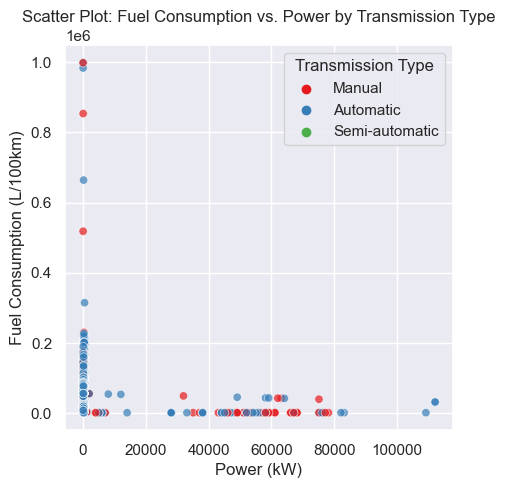

C:\Users\Yahia\AppData\Local\Temp\ipykernel_12172\2965498557.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


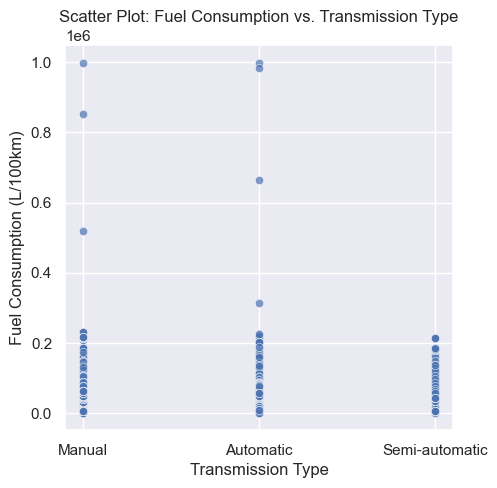

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Scatter plot between power_kw and fuel_consumption_l_100km
plt.figure(figsize=(5,5))
sns.scatterplot(
    data=df,
    x="power_kw",
    y="fuel_consumption_l_100km",
    hue="transmission_type",
    palette="Set1",
    alpha=0.7,
)

# Add labels and title
plt.xlabel("Power (kW)")
plt.ylabel("Fuel Consumption (L/100km)")
plt.title("Scatter Plot: Fuel Consumption vs. Power by Transmission Type")

# Display the legend
plt.legend(title="Transmission Type")

# Show the plot
plt.show()

# Scatter plot between transmission_type and fuel_consumption_l_100km
plt.figure(figsize=(5,5))
sns.scatterplot(
    data=df,
    x="transmission_type",
    y="fuel_consumption_l_100km",
    palette="Set1",
    alpha=0.7,
)

# Add labels and title
plt.xlabel("Transmission Type")
plt.ylabel("Fuel Consumption (L/100km)")
plt.title("Scatter Plot: Fuel Consumption vs. Transmission Type")

# Show the plot
plt.show()


Research Question 1:
 How does the fuel efficiency (fuel consumption in liters per 100 kilometers) of German used cars in 2023 
 vary based on their transmission type and power (measured in kilowatts)?





Power and Fuel Consumption Correlation:

Fuel usage and power seem to be negatively correlated in general. Powerful cars might have more fuel-efficient engines, which would reduce fuel usage. The engine's efficiency and design have a big impact on this relationship.


Relationship between Fuel Consumption and Gearbox Type:

When opposed to manual gearboxes, automatic transmissions are frequently linked to somewhat higher fuel consumption. In some driving situations, automatic transmissions could not be as fuel-efficient because they might need more power to function. Drivers with manual transmissions have more control over changing gears, which may result in increased fuel economy.

